# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('demo01.csv')

In [6]:
df.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [10]:
df.isna().sum().sort_values().head

<bound method NDFrame.head of sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64>

In [16]:
df.shape

(16650, 16)

In [11]:
df.mau.sum()

390

In [20]:
porcentagem_mau = df.mau.sum()*100/df.shape[0]
porcentagem_mau

2.3423423423423424

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [55]:
df2 = pd.DataFrame()

In [64]:
colunas = []
for i in range(0,len(df.columns)):
    coluna = df.columns[i]
    colunas.append(coluna)
    

In [66]:
df2['Colunas'] = colunas

In [72]:
tipos = []
for i in range(0,len(df.dtypes)):
    tipo = df.dtypes[i]
    tipos.append(tipo)

In [73]:
df2['Tipo'] = tipos

In [75]:
df2['Qtd_Categorias'] = pd.Series()

C:\Users\FELIPE~1\AppData\Local\Temp/ipykernel_17724/2488977027.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df2['Qtd_Categorias'] = pd.Series()


In [87]:
quantidade_categorias = []
for i in colunas:
    quantidade = len(df[i].unique())
    quantidade_categorias.append(quantidade)

In [89]:
df2 ['Qtd_Categorias'] = quantidade_categorias
df2

,Colunas,Tipo,Qtd_Categorias
0,sexo,object,2
1,posse_de_veiculo,object,2
2,posse_de_imovel,object,2
3,qtd_filhos,int64,8
4,tipo_renda,object,5
5,educacao,object,5
6,estado_civil,object,5
7,tipo_residencia,object,6
8,idade,float64,5298
9,tempo_emprego,float64,3005


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [95]:
dicionario = {
    'M':0,
    'F':1
}
df.sexo = df.sexo.map(dicionario)

In [100]:
df.rename(columns={'sexo':'sexo_F'},inplace=True)

In [102]:
dicionario = {
    'Y':1,
    'N':0
}
df.posse_de_veiculo = df.posse_de_veiculo.map(dicionario)
df.posse_de_imovel = df.posse_de_imovel.map(dicionario)

In [109]:
pd.get_dummies(df['tipo_renda'])

,Commercial associate,Pensioner,State servant,Student,Working
0,0,0,0,0,1
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
16645,0,0,0,0,1
16646,1,0,0,0,0
16647,0,0,0,0,1
16648,0,0,0,0,1


In [111]:
df = pd.get_dummies(df,columns=['tipo_renda','educacao','estado_civil','tipo_residencia'],drop_first=True)

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [117]:
freq = pd.crosstab(df['possui_email'],df['posse_de_veiculo'])
freq.sum(axis=1)

possui_email
0    15170
1     1480
dtype: int64

In [118]:
freq

posse_de_veiculo,0,1
possui_email,,
0,9341,5829
1,837,643


<AxesSubplot:xlabel='possui_email'>

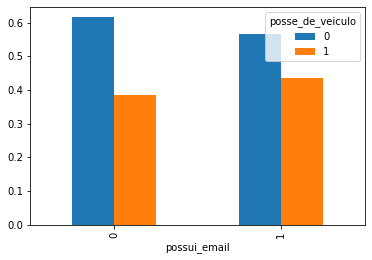

In [119]:
freq_pctlin = freq_pctlin=freq.div(freq.sum(axis=1),axis=0)
freq_pctlin.plot.bar()

In [120]:
teste = pd.crosstab(df['posse_de_veiculo'],df['mau'])
teste2 = pd.crosstab(df['possui_email'],df['mau'])

<AxesSubplot:xlabel='posse_de_veiculo'>

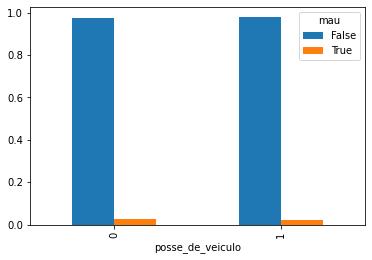

In [128]:
teste_pctlin = teste.div(teste.sum(axis=1),axis=0)
teste_pctlin.plot.bar()

<AxesSubplot:xlabel='possui_email'>

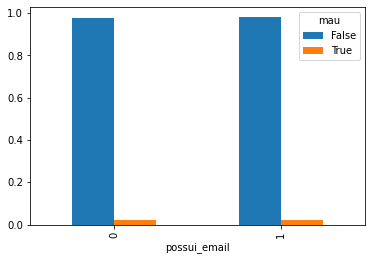

In [132]:
teste2_pctlin = teste2.div(teste2.sum(axis=1),axis=0)
teste2_pctlin.plot.bar()

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [134]:
df.to_csv('df_tratado.csv')